# Getting started

Install the requirements:

In [1]:
!python3 -m pip install -r requirements.txt

You should consider upgrading via the '/Users/ozlemyildiz/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# this should now run
import kaggle_environments

Loading environment football failed: No module named 'gfootball'


In [3]:
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils

If any problems were encountered, [this](https://www.kaggle.com/antimatter543/running-games-locally-with-jupyter-notebook) post has some info on running Kaggle locally

Useful information:

```python
# Setup a hungry_geese environment and run agent vs a random.
# Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
env = make("hungry_geese", debug=True) 

# each element in the list is a different opponent
env.run([agent, agent,agent, agent])

# visualize the environment
env.render(mode="ipython", width=500, height=450)
```

Creates a simple random agent

In [4]:
import numpy as np
actions = np.array(["EAST", "SOUTH", "NORTH", "WEST"])

def random_agent(obs, config):
    return np.random.choice(actions)

random_agent({}, {})

'NORTH'

In [5]:
# Setup a hungry_geese environment and run agent vs a random.
env = make("hungry_geese", debug=True) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
env.run([random_agent, random_agent, random_agent, random_agent])
env.render(mode="ipython", width=500, height=450)

Opposite action: (3, <Action.WEST: 4>, <Action.EAST: 2>)
Opposite action: (2, <Action.EAST: 2>, <Action.WEST: 4>)
Opposite action: (1, <Action.SOUTH: 3>, <Action.NORTH: 1>)


As we can see above, a random agent is quite bad, since it sometimes goes back onto itself, therefore losing; we can do slightly better:

In [6]:
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils
import numpy as np
actions = np.array(["EAST", "SOUTH", "NORTH", "WEST"])
opp_actions = {'EAST': 'WEST', 'WEST': 'EAST', 'NORTH':'SOUTH', 'SOUTH':'NORTH'}

# Creates a class for an agent so we can keep track of the last action
class RandomAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, observation: Observation):
        action = np.random.choice(actions) 
        while action == opp_actions.get(self.last_action, ""):
            action = np.random.choice(actions)
        self.last_action = action
        return action

cached_agents = {}
def agent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = RandomAgent(Configuration(config))
    return cached_agents[index](Observation(obs))

This gives us much better results (at least we don't go backwards):

In [7]:
env.run([agent, agent])
env.render(mode="ipython", width=500, height=450)

Goose Collision: EAST
Goose Collision: SOUTH


Below is to understand which agent is which color:

Results: White, Blue, Green, Red 

But you need to pass as : env.run([southagent, northagent, eastagent, westagent]) 


In [8]:
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils
import numpy as np
actions = np.array(["EAST", "SOUTH", "NORTH", "WEST"])
opp_actions = {'EAST': 'WEST', 'WEST': 'EAST', 'NORTH':'SOUTH', 'SOUTH':'NORTH'}
tryi = actions[actions != 'EAST']



# Creates a class for an agent so we can keep track of the last action
class SouthAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, obs):
        action = 'SOUTH'
        return action

    
    
cached_agents = {}
def southagent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = SouthAgent(Configuration(config))
    return cached_agents[index](Observation(obs))



# Creates a class for an agent so we can keep track of the last action
class NorthAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, obs):
        action = 'NORTH'
        return action

    
    
cached_agents = {}
def northagent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = NorthAgent(Configuration(config))
    return cached_agents[index](Observation(obs))


class EastAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, obs):
        action = 'EAST'
        return action

    
    
cached_agents = {}
def eastagent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = EastAgent(Configuration(config))
    return cached_agents[index](Observation(obs))



# Creates a class for an agent so we can keep track of the last action
class WestAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, obs):
        action = 'WEST'
        return action

    
    
cached_agents = {}
def westagent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = WestAgent(Configuration(config))
    return cached_agents[index](Observation(obs))

In [9]:
env = make("hungry_geese", debug=True) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
env.run([southagent, northagent, eastagent, westagent]) 
#ORDER: white,blue,green,red
env.render(mode="ipython", width=500, height=450)

Goose Collision: NORTH
Goose Collision: WEST
Goose Starved: Action.SOUTH


In [10]:
from kaggle_environments.envs.hungry_geese.hungry_geese import GreedyAgent
cached_greedy_agents = {}

def greedy_agent(obs, config):
    index = obs["index"]
    if index not in cached_greedy_agents:
        cached_greedy_agents[index] = GreedyAgent(Configuration(config))
    return cached_greedy_agents[index](Observation(obs))


agents = {random_agent, agent, greedy_agent}

In [11]:
env = make("hungry_geese", debug=True) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
steps = env.run([greedy_agent,random_agent, agent])  
#print(steps)
out = env.render(mode="ipython", width=500, height=450)

Opposite action: (1, <Action.EAST: 2>, <Action.WEST: 4>)
Goose Collision: EAST


Below is the demonstration of the reward for three different agents

In [12]:
print(steps[-1][2])

{'action': 'EAST', 'reward': 3903, 'info': {}, 'observation': {'remainingOverageTime': 60, 'index': 2}, 'status': 'DONE'}


In [13]:
nOfTrial =100;
env = make("hungry_geese", debug=False) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)

greedyR = np.zeros(nOfTrial)
randomR = np.zeros(nOfTrial)
agentR = np.zeros(nOfTrial)

for i in range(nOfTrial):
    steps = env.run([greedy_agent,random_agent, agent])  
    greedyR[i] = steps[-1][0]['reward']
    randomR[i] = steps[-1][1]['reward']
    agentR[i] = steps[-1][2]['reward']


Text(0, 0.5, 'Reward')

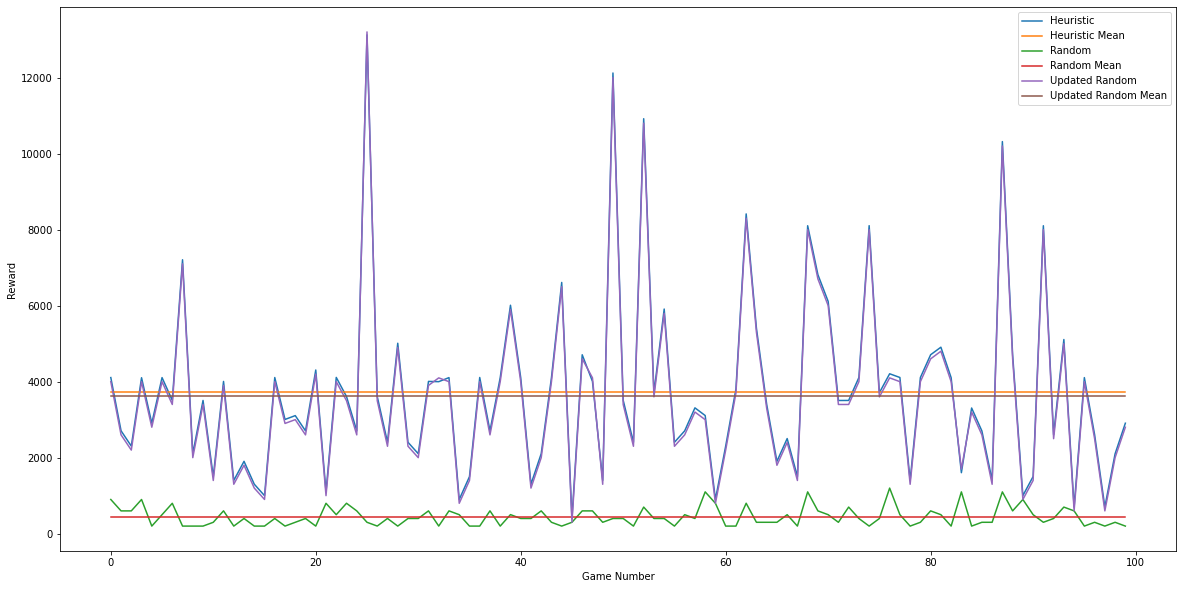

In [14]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20,10))
plt.plot(greedyR)
plt.plot(np.mean(greedyR)*np.ones(nOfTrial))
plt.plot(randomR)
plt.plot(np.mean(randomR)*np.ones(nOfTrial))
plt.plot(agentR)
plt.plot(np.mean(agentR)*np.ones(nOfTrial))
plt.legend(['Heuristic','Heuristic Mean','Random', 'Random Mean', 'Updated Random', 'Updated Random Mean'])
plt.xlabel('Game Number')
plt.ylabel('Reward')

In [15]:
environment = "hungry_geese"
configuration = {"rows": 11, "columns": 7}
steps = []

# Which agents to run repeatedly.  Same as env.run(agents)
agents = [greedy_agent,random_agent, agent]

# How many times to run them.
num_episodes = 1000

rewards = evaluate(environment, agents, configuration, steps, num_episodes)


(1000, 3)


Text(0.5, 1.0, 'Agent Comparison')

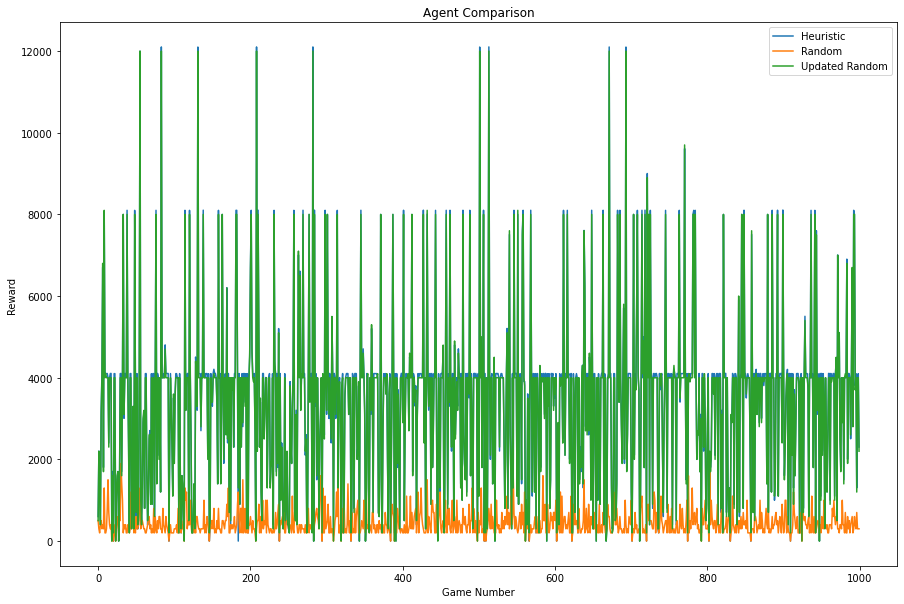

In [16]:
rewards = np.array(rewards)
print(rewards.shape)

fig = plt.figure(figsize=(15,10))

plt.plot(rewards[:,0])
plt.plot(rewards[:,1])
plt.plot(rewards[:,2])

plt.legend(['Heuristic', 'Random' , 'Updated Random'])
plt.xlabel('Game Number')
plt.ylabel('Reward')
plt.title('Agent Comparison')

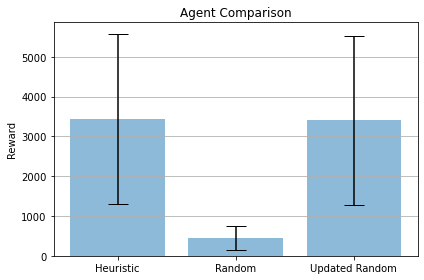

In [17]:
means = np.mean(rewards, 0)
stds = np.std(rewards, 0)
agents = ['Heuristic', 'Random', 'Updated Random']
x_pos = np.arange(len(agents))



# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Reward')
ax.set_xticks(x_pos)
ax.set_xticklabels(agents)
ax.set_title('Agent Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('mean-std')
plt.show()


In [18]:
print(env.state)

[{'action': 'NORTH', 'reward': 2908, 'info': {}, 'observation': {'remainingOverageTime': 60, 'step': 28, 'geese': [[12, 23, 24, 25, 26, 27, 28, 17], [], []], 'food': [76, 30], 'index': 0}, 'status': 'DONE'}, {'action': 'NORTH', 'reward': 201, 'info': {}, 'observation': {'remainingOverageTime': 60, 'index': 1}, 'status': 'DONE'}, {'action': 'EAST', 'reward': 2802, 'info': {}, 'observation': {'remainingOverageTime': 60, 'index': 2}, 'status': 'DONE'}]


Text(0.5, 0, 'Moving Window Number')

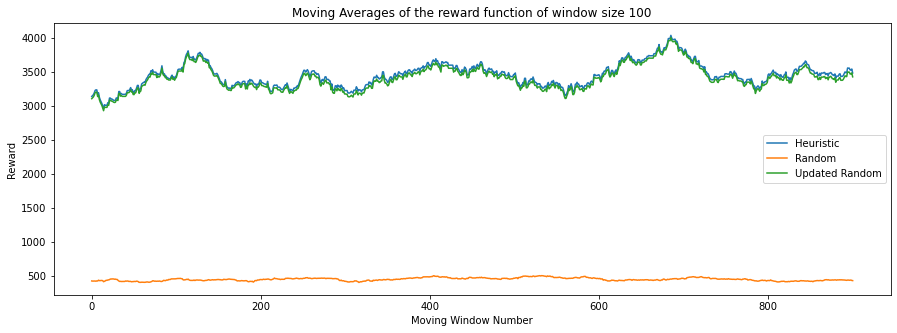

In [19]:
heu = np.convolve(rewards[:,0],np.ones(100,dtype=int),'valid')/100
rnd = np.convolve(rewards[:,1],np.ones(100,dtype=int),'valid')/100
updrnd = np.convolve(rewards[:,2],np.ones(100,dtype=int),'valid')/100


fig = plt.figure(figsize=(15,5))
plt.plot(heu)
plt.plot(rnd)
plt.plot(updrnd)
plt.title('Moving Averages of the reward function of window size 100')
plt.legend(['Heuristic', 'Random', 'Updated Random'])
plt.ylabel('Reward')
plt.xlabel('Moving Window Number')


In [27]:
dqn_agent = "agent_dqn_1_1.py"

In [32]:
nOfTrial =100;
env = make("hungry_geese", debug=True) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)

greedyR = np.zeros(nOfTrial)
randomR = np.zeros(nOfTrial)
agentR = np.zeros(nOfTrial)

for i in range(nOfTrial):
    steps = env.run([greedy_agent,random_agent, dqn_agent])  
    greedyR[i] = steps[-1][0]['reward']
    randomR[i] = steps[-1][1]['reward']
    agentR[i] = steps[-1][2]['reward']
    


Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid raw Python: NameError("name 'agent_dqn_1_1' is not define

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid raw Python: NameError("name 'agent_dqn_1_1' is not define

Opposite action: (1, <Action.SOUTH: 3>, <Action.NORTH: 1>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invali

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid raw Python: NameError("name 'agent_dqn_1_1' is not define

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid raw Python: NameError("name 'agent_dqn_1_1' is not define

Opposite action: (1, <Action.EAST: 2>, <Action.WEST: 4>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid 

Opposite action: (1, <Action.SOUTH: 3>, <Action.NORTH: 1>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invali

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid raw Python: NameError("name 'agent_dqn_1_1' is not define

Opposite action: (1, <Action.EAST: 2>, <Action.WEST: 4>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid 

Opposite action: (1, <Action.WEST: 4>, <Action.EAST: 2>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid 

Opposite action: (1, <Action.WEST: 4>, <Action.EAST: 2>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid 

Opposite action: (1, <Action.NORTH: 1>, <Action.SOUTH: 3>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invali

Opposite action: (1, <Action.SOUTH: 3>, <Action.NORTH: 1>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invali

Opposite action: (1, <Action.WEST: 4>, <Action.EAST: 2>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid 

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invalid raw Python: NameError("name 'agent_dqn_1_1' is not define

Opposite action: (1, <Action.SOUTH: 3>, <Action.NORTH: 1>)
Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 45, in get_last_callable
    exec(code_object, env)
  File "<string>", line 1, in <module>
NameError: name 'agent_dqn_1_1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 151, in act
    action = self.agent(*args)
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 116, in callable_agent
    agent = get_last_callable(raw) or raw
  File "/Users/ozlemyildiz/opt/anaconda3/lib/python3.8/site-packages/kaggle_environments/agent.py", line 58, in get_last_callable
    raise InvalidArgument("Invalid raw Python: " + repr(e))
kaggle_environments.errors.InvalidArgument: Invali

(1000, 3)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


Text(0.5, 1.0, 'Agent Comparison')

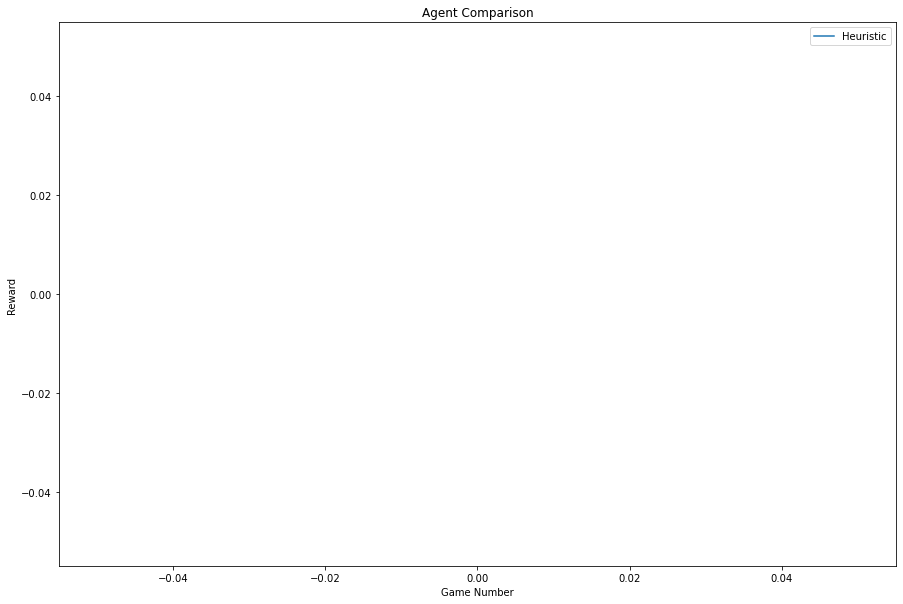

In [31]:


fig = plt.figure(figsize=(15,10))

plt.plot(agentR)

plt.legend(['Heuristic', 'Random' , 'DQN'])
plt.xlabel('Game Number')
plt.ylabel('Reward')
plt.title('Agent Comparison')

For more info on the information provided in the jsons, see [this](https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/hungry_geese/hungry_geese.json) json;

Let's put that into a single python file and submit to Kaggle;

First we'll get the name of the notebook into a python variable:

In [23]:
means = np.mean(rewards, 0)
stds = np.std(rewards, 0)
agents = ['Heuristic', 'Random', 'Updated Random']
x_pos = np.arange(len(agents))



# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Reward')
ax.set_xticks(x_pos)
ax.set_xticklabels(agents)
ax.set_title('Agent Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('mean-std')
plt.show()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [13]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [14]:
py_name = nb_name[:-6] + ".py"  # swap out .ipynb for .py
print(py_name)

1.0-bgc-Tutorial.py


In [15]:
%%writefile $py_name

from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils
import numpy as np
actions = np.array(["EAST", "SOUTH", "NORTH", "WEST"])
opp_actions = {'EAST': 'WEST', 'WEST': 'EAST', 'NORTH':'SOUTH', 'SOUTH':'NORTH'}

# Creates a class for an agent so we can keep track of the last action
class RandomAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, observation: Observation):
        action = np.random.choice(actions) 
        while action == opp_actions.get(self.last_action, ""):
            action = np.random.choice(actions)
        self.last_action = action
        return action

cached_agents = {}
def agent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = RandomAgent(Configuration(config))
    return cached_agents[index](Observation(obs))

Overwriting 1.0-bgc-Tutorial.py


In [16]:
# Test the agent file
env.run(["1.0-bgc-Tutorial.py", "1.0-bgc-Tutorial.py"])
env.render(mode="ipython", width=500, height=450)

Goose Collision: EAST


That's it, just submit the py file on Kaggle! Your agent will start with 600 as it's ranking and slowly gain/lose depending on how it does.

![image.png](1.0-bgc-Tutorial.png)